In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# developing a base station to feed images and get the output of disease and provide prevention and remedies for the same 
# and a simple website interface

In [3]:
plant_data=tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ASUS\Desktop\Subjects\3RD SEMESTER\MINI PROJECT\Datasets\PlantVillage",
    shuffle="True",
    image_size=(256,256),
    batch_size=32)

Found 14330 files belonging to 11 classes.


In [4]:
plant_class=plant_data.class_names
plant_class

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
def train_test_split(data,train_size=0.8,test_size=0.1):
    shuffle=True
    shuffle_size=10000
    if shuffle:
        data=data.shuffle(shuffle_size,seed=15)
    train=int(len(plant_data)*0.8)
    val=int(len(plant_data)*0.1)
    train_ds=data.take(train)
    val_ds=data.skip(train).take(val)
    test_ds=data.skip(train).skip(val)
    return train_ds,val_ds,test_ds


In [6]:
train_ds,val_ds,test_ds=train_test_split(plant_data)

In [7]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_reshape = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(256,256)
,tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])

In [11]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

In [12]:
shape=(32,256,256,3)
model = tf.keras.models.Sequential([
    resize_and_reshape,
    data_aug,
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])

model.build(input_shape=shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [14]:
model.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                           metrics=['accuracy'])

In [25]:
history=model.fit(
    train_ds,
    epochs=5,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
358/358 [==============================] - 352s 985ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0944 - val_accuracy: 0.9659
Epoch 2/5
358/358 [==============================] - 336s 938ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 3/5
358/358 [==============================] - 334s 933ms/step - loss: 0.0513 - accuracy: 0.9815 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 4/5
358/358 [==============================] - 332s 928ms/step - loss: 0.0461 - accuracy: 0.9843 - val_loss: 0.1108 - val_accuracy: 0.9652
Epoch 5/5
358/358 [==============================] - 332s 929ms/step - loss: 0.0583 - accuracy: 0.9796 - val_loss: 0.0885 - val_accuracy: 0.9737


In [26]:
model.evaluate(test_ds)

46/46 [==============================] - 10s 212ms/step - loss: 0.0757 - accuracy: 0.9789


[0.0756775364279747, 0.9789401888847351]

In [28]:
history.history['accuracy']

[0.9820181727409363,
 0.9786138534545898,
 0.9814944267272949,
 0.9842877388000488,
 0.9795740246772766]

In [44]:
def predict(model, img):
    img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=plant_class[np.argmax(predictions[0])]
    confidence =round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 56ms/step


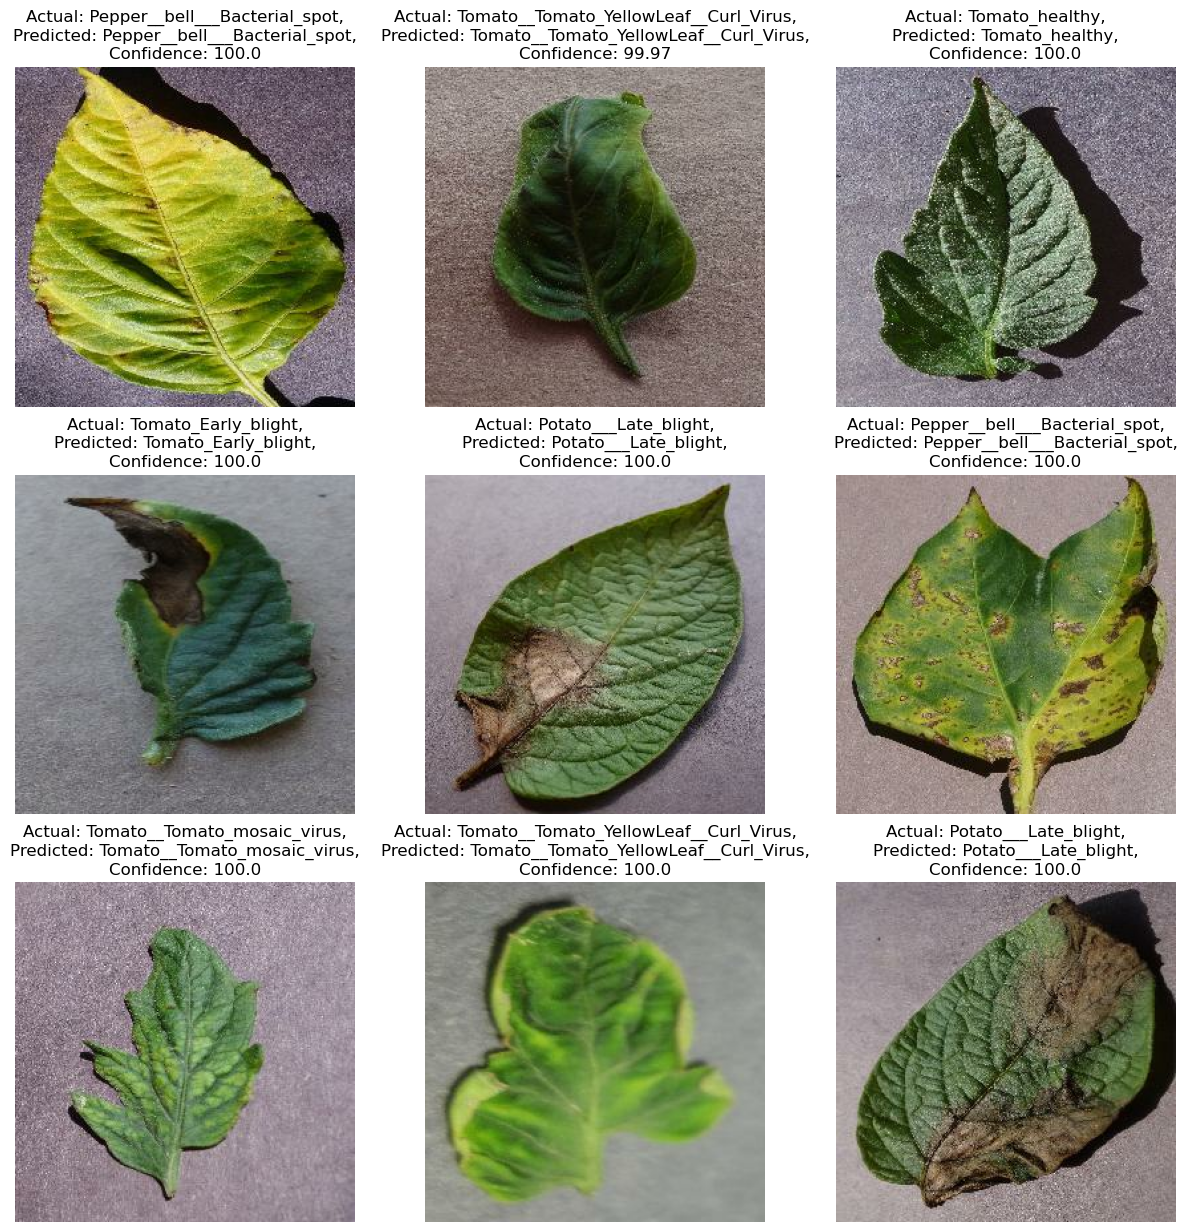

In [49]:
plt.figure(figsize=(15,15))
for images,labels in test_ds .take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model,images[i].numpy)
        actual_class= plant_class[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}")
        plt.axis('off')
        

In [54]:
model.save(r"C:\Users\ASUS\Desktop\Subjects\3RD SEMESTER\MINI PROJECT\Model/")

INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\Subjects\3RD SEMESTER\MINI PROJECT\Model/assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\Subjects\3RD SEMESTER\MINI PROJECT\Model/assets
